<a href="https://colab.research.google.com/github/Zafeerahamad/Cat_vs_dog/blob/main/Cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# here we are importing TensorFlow Library and Keras

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Convolution2D,Dense,MaxPooling2D,Dropout,Flatten
from keras import models
import pathlib


In [3]:
data_dir='/content/drive/MyDrive/Colab Notebooks/cat_vs_dog/training_set'
data_dir=pathlib.Path(data_dir)
data_dir


PosixPath('/content/drive/MyDrive/Colab Notebooks/cat_vs_dog/training_set')

#Importing the Images from directory
let we have a training directory
1. training_dataset

    i. **cats_images-**
        . cat1.jpg
        . cat2.jpg
        . cat3.jpg
        .
        .
    ii. Dog images-
        . dog1.jpg
        . dog2.jpg
        . dog3.jpg
        .
        .

if we are working in the training dataset **keras.preprocessing.image_dataset_from_directory()** will autometically reach the all the images present in both the folder. and there labels are set as there folder name like **cat images**, **Dog images**

In [4]:
train_dataset=keras.preprocessing.image_dataset_from_directory(data_dir,label_mode="categorical",
                                                        
                                                             labels='inferred',batch_size=32,validation_split=0.25,subset='validation',seed=123
                                                             ,image_size=(256, 256))

Found 8015 files belonging to 2 classes.
Using 2003 files for validation.


## Training Dataset has two classes
1. cats
2. Dogs

In [7]:
train_dataset.class_names

['cats', 'dogs']

# Model creation, Compilation, and Trining

In [8]:
#model = keras.applications.Xception(weights=None, input_shape=(256, 256, 3), classes=2)
model= models.Sequential()
model.add(Convolution2D(16,3,padding='same',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Convolution2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D())

model.add(Convolution2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics='accuracy')
h=model.fit(train_dataset, epochs=10)

Epoch 1/10
63/63 [==============================] - 105s 2s/step - loss: 6.3523 - accuracy: 0.5482
Epoch 2/10
63/63 [==============================] - 102s 2s/step - loss: 0.6235 - accuracy: 0.6455
Epoch 3/10
63/63 [==============================] - 101s 2s/step - loss: 0.4809 - accuracy: 0.7634
Epoch 4/10
63/63 [==============================] - 104s 2s/step - loss: 0.3786 - accuracy: 0.8293
Epoch 5/10
63/63 [==============================] - 101s 2s/step - loss: 0.2870 - accuracy: 0.8887
Epoch 6/10
63/63 [==============================] - 104s 2s/step - loss: 0.1922 - accuracy: 0.9296
Epoch 7/10
63/63 [==============================] - 103s 2s/step - loss: 0.1719 - accuracy: 0.9406
Epoch 8/10
63/63 [==============================] - 103s 2s/step - loss: 0.1177 - accuracy: 0.9566
Epoch 9/10
63/63 [==============================] - 103s 2s/step - loss: 0.1024 - accuracy: 0.9675
Epoch 10/10
63/63 [==============================] - 102s 2s/step - loss: 0.0873 - accuracy: 0.9740


In [9]:
model_history=h.history


## Visualisation

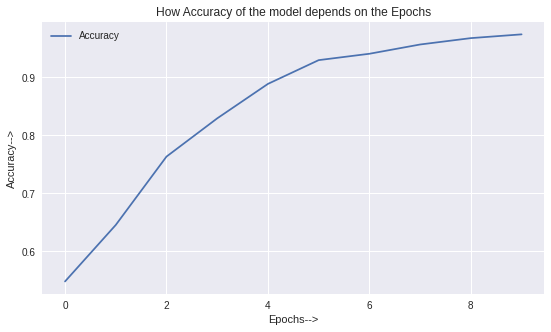

In [11]:
plt.style.use('seaborn')
plt.figure(figsize=(9,5))
plt.plot(model_history['accuracy'],label='Accuracy')
#plt.plot(history['loss'],label='Loss')
plt.xlabel("Epochs-->")
plt.ylabel("Accuracy-->")
plt.title("How Accuracy of the model depends on the Epochs")

plt.legend()
plt.show()

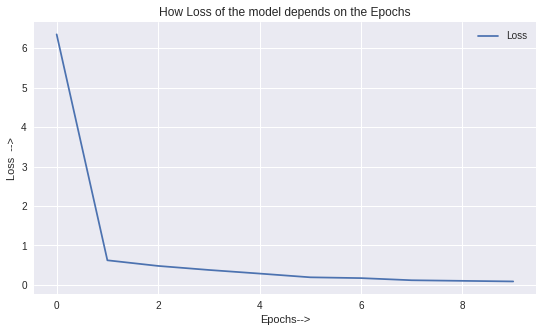

In [12]:
plt.style.use('seaborn')
plt.figure(figsize=(9,5))
plt.plot(model_history['loss'],label='Loss')
#plt.plot(history['loss'],label='Loss')
plt.xlabel("Epochs-->")
plt.ylabel("Loss  -->")
plt.title("How Loss of the model depends on the Epochs")

plt.legend()
plt.show()

# Testing of image

In [ ]:
import os

enter your image directory where you have your images/content/drive/MyDrive/Colab Notebooks/cat_vs_dog/testing_set
This image Belomgs to Dog with 99.87 % accuracy


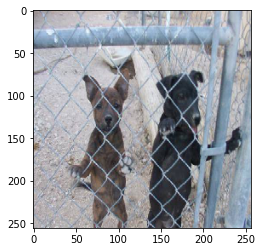

This image Belomgs to Dog with 100.00 % accuracy


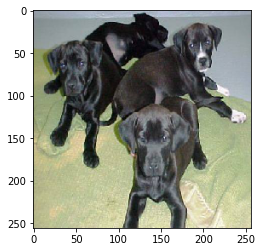

This image Belomgs to Dog with 99.99 % accuracy


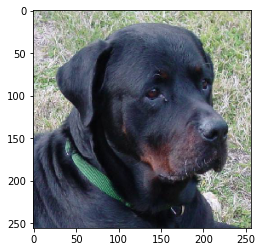

This image Belomgs to Dog with 84.68 % accuracy


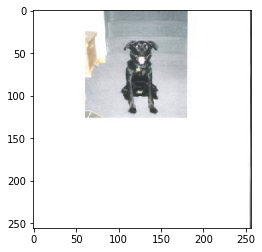

This image Belomgs to Dog with 90.93 % accuracy


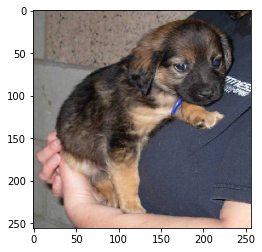

This image Belomgs to Dog with 100.00 % accuracy


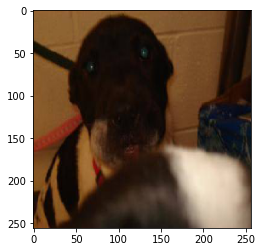

This image Belomgs to Dog with 99.90 % accuracy


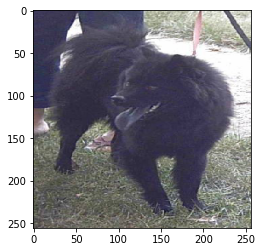

This image Belomgs to Dog with 95.65 % accuracy


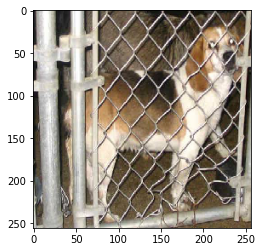

This image Belomgs to Dog with 100.00 % accuracy


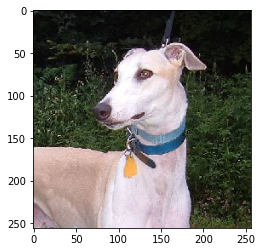

This image Belomgs to Cat with 73.61 % accuracy


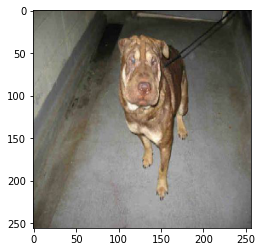

This image Belomgs to Cat with 99.99 % accuracy


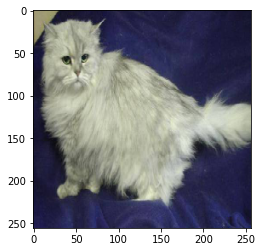

This image Belomgs to Cat with 100.00 % accuracy


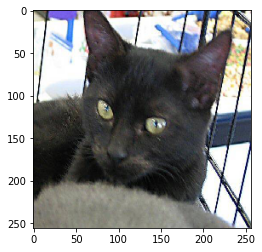

This image Belomgs to Cat with 100.00 % accuracy


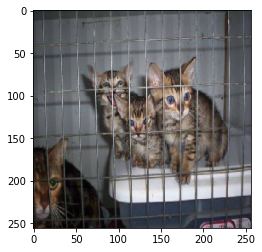

This image Belomgs to Cat with 99.71 % accuracy


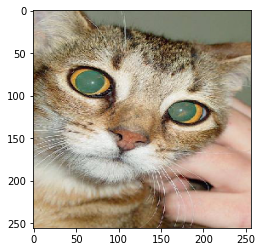

This image Belomgs to Cat with 100.00 % accuracy


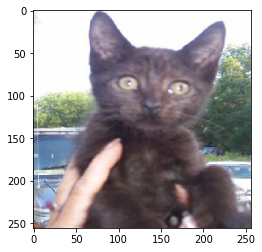

This image Belomgs to Cat with 100.00 % accuracy


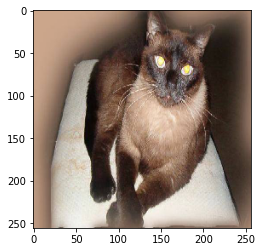

This image Belomgs to Cat with 86.82 % accuracy


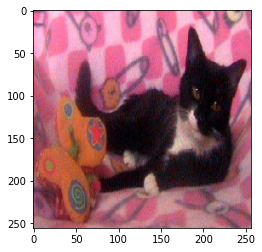

This image Belomgs to Cat with 100.00 % accuracy


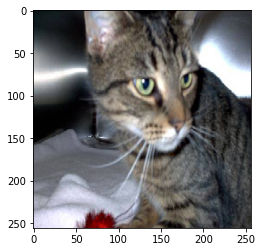

This image Belomgs to Dog with 53.97 % accuracy


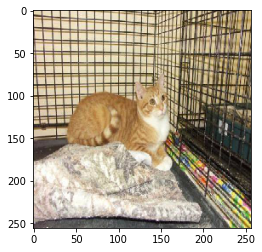

This image Belomgs to Cat with 100.00 % accuracy


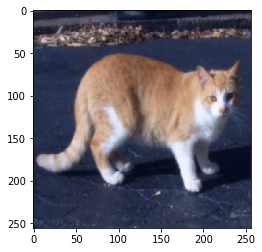

This image Belomgs to Cat with 100.00 % accuracy


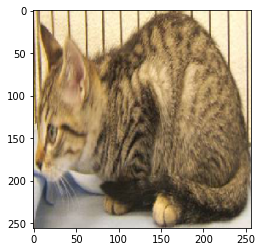

This image Belomgs to Cat with 100.00 % accuracy


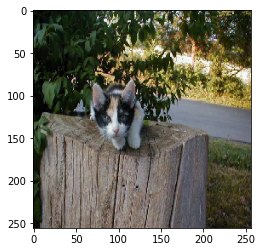

This image Belomgs to Cat with 99.76 % accuracy


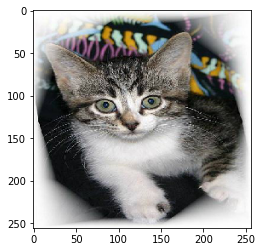

This image Belomgs to Dog with 63.29 % accuracy


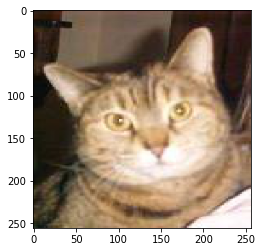

In [ ]:

imgdir=input("enter your image directory where you have your images")
all_img=os.listdir(imgdir)
for i in all_img:
    img=keras.preprocessing.image.load_img(imgdir+'/'+i,target_size=(256,256))
    img_array=keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array,axis=0)
    prediction=model.predict(img_array)
    if np.argmax(prediction)==1:
        print('This image Belomgs to Dog with {:.2f} % accuracy'.format(np.max(prediction)*100))
    else:
        print('This image Belomgs to Cat with {:.2f} % accuracy'.format(np.max(prediction)*100))
    #score=tf.nn.softmax(prediction)
    plt.imshow(img)
    #print(score,np.argmax(score))
    plt.show()





## for saving the model for again use.

In [ ]:
!pip install h5py pyyaml


In [14]:
model.save('/content/drive/MyDrive/Colab Notebooks/cat_vs_dog/cat_dog_model.h5')
new_model=keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/cat_vs_dog/cat_dog_model.h5')
new_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 64)       

## Uploading saved Model directly

In [5]:
new_model=keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/cat_vs_dog/cat_dog_model.h5')

In [6]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0

In [7]:
test_dir='/content/drive/MyDrive/Colab Notebooks/cat_vs_dog/test_set'
test_dir=pathlib.Path(test_dir)
test_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/cat_vs_dog/test_set')

In [8]:
test_dataset=keras.preprocessing.image_dataset_from_directory(test_dir,label_mode="categorical",
                                                        
                                                             labels='inferred',batch_size=32,validation_split=0.25,subset='validation',seed=123
                                                             ,image_size=(256, 256))

Found 1064 files belonging to 2 classes.
Using 266 files for validation.


In [10]:
new_pred=new_model.predict(test_dataset)

In [ ]:
for i in new_pred:
    if np.argmax(i)==1:
        print('Dog')
    else:
        print('Cat')


In [19]:
l=list(test_dataset.as_numpy_iterator())